<a href="https://colab.research.google.com/github/shoaibimt/CancerAI/blob/main/file_6_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature selection  based on selectKbest method

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
sns.set(style='ticks')

In [ ]:
!pip install datashader

In [ ]:
!pip install scikit-image

In [ ]:
## Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
path_cdk= '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/mol_fingerprints/Results/CDK.csv'

In [ ]:
path_bin = '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/chembl_bin_values.csv'

In [ ]:
y = pd.read_csv(path_bin)

In [ ]:
y #dependent column (output column)

,pchembl_bin
0,0
1,0
2,0
3,0
4,0
...,...
393,1
394,1
395,0
396,1


In [ ]:
y_ac_inac = y.replace({0: 'inactive', 1: 'active'})

In [ ]:
y_ac_inac

,pchembl_bin
0,inactive
1,inactive
2,inactive
3,inactive
4,inactive
...,...
393,active
394,active
395,inactive
396,active


In [ ]:
class_mapping = {0: 'class1', 1: 'class2'}
df['class_labels'] = df['y'].map(class_mapping)

# Display the DataFrame with class labels
print(df)

In [ ]:
cdk_df= pd.read_csv(path_cdk)

In [ ]:
cdk_df

,Name,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,CHEMBL199723,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,CHEMBL381738,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,CHEMBL436509,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,CHEMBL370800,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,CHEMBL165,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,CHEMBL4794093,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
394,CHEMBL4794284,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
395,CHEMBL4780226,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
396,CHEMBL4786855,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
X_cdk = cdk_df.drop('Name', axis=1)

In [ ]:
#X_maccs

In [ ]:
X_cdk # independent columns

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
! pip install umap-learn


In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import datashader as ds
import bokeh.plotting as bk
import holoviews as hv
import skimage
import colorcet

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
#pipe = make_pipeline(PowerTransformer())
#X = pipe.fit_transform(X_cdk.copy())

In [ ]:
manifold = umap.UMAP().fit(X_cdk, y)

In [ ]:
np.unique(y_ac_inac)

array(['active', 'inactive'], dtype=object)

In [ ]:
labels = y_ac_inac.squeeze()

In [ ]:
if len(y_ac_inac) > len(manifold):
    y_ac_inac = y_ac_inac[:len(manifold)]
else:
    y_ac_inac = np.pad(y_ac_inac, (0, len(manifold) - len(y_ac_inac)), 'constant')

umap.plot.points(manifold, labels=y_ac_inac, theme="fire");

TypeError: ignored

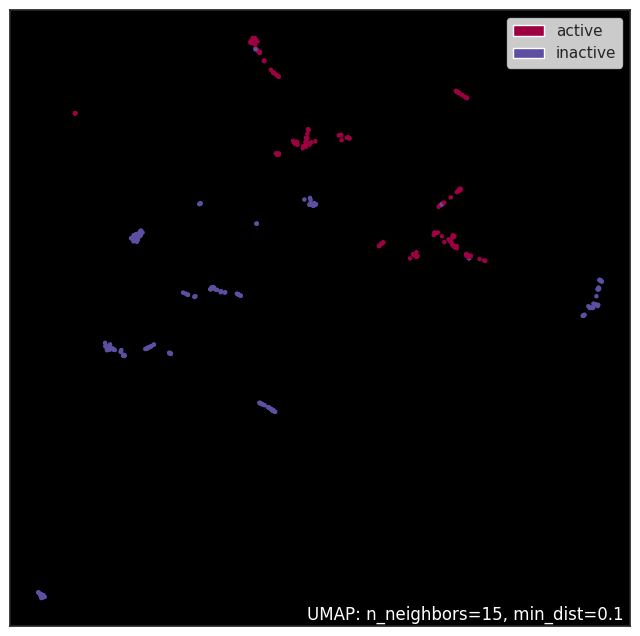

In [ ]:
import umap.plot

umap.plot.points(manifold, labels=y_ac_inac.values.flatten(), theme="viridis");


<Axes: >

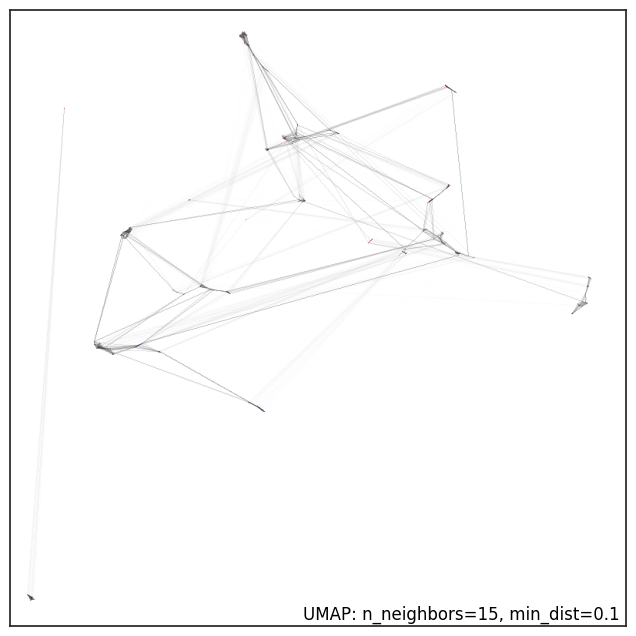

In [ ]:
umap.plot.connectivity(manifold, labels=y_ac_inac.values.flatten(), show_points=True)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

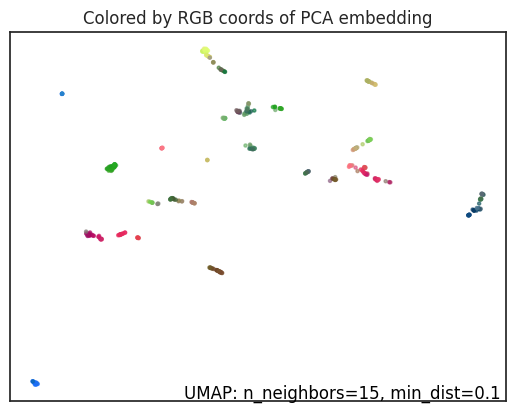

In [ ]:
umap.plot.diagnostic(manifold, diagnostic_type='pca')

In [ ]:
#print(X_cdk.describe())

In [ ]:
X_cdk.columns

Index(['FP1', 'FP2', 'FP3', 'FP4', 'FP5', 'FP6', 'FP7', 'FP8', 'FP9', 'FP10',
       ...
       'FP1015', 'FP1016', 'FP1017', 'FP1018', 'FP1019', 'FP1020', 'FP1021',
       'FP1022', 'FP1023', 'FP1024'],
      dtype='object', length=1024)

**Chi-square test**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#X_cat = X_cdk.astype(int)

In [ ]:
chi2_features =SelectKBest(chi2, k = 20)
X_best_features = chi2_features.fit_transform(X_cdk, y)
print("original features: " ,X_cdk.shape[1])
print("reduced features: " ,X_best_features.shape[1])

original features:  1024
reduced features:  20


In [ ]:
X_best_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]])

**accuracy without feature selection**

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [ ]:
fit = bestfeatures.fit(X_cdk,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)

In [ ]:
dfcolumns = pd.DataFrame(X_cdk.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
featureScores.columns = ['Specs','Score']

In [ ]:
print(featureScores.nlargest(10,'Score'))

     Specs      Score
91    FP92  47.590042
140  FP141  46.186623
549  FP550  42.902290
970  FP971  40.340181
639  FP640  39.608659
536  FP537  38.911197
256  FP257  37.384745
361  FP362  37.224514
239  FP240  36.646531
39    FP40  34.936498


In [ ]:
featureScores

,Specs,Score
0,FP1,19.197022
1,FP2,2.123514
2,FP3,3.936319
3,FP4,0.597336
4,FP5,1.418626
...,...,...
1019,FP1020,0.005905
1020,FP1021,0.002315
1021,FP1022,1.891502
1022,FP1023,24.740685


In [ ]:
featureScores.shape

(1024, 2)

**Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X_cdk, threshold=0.1)
X

,FP1,FP2,FP3,FP7,FP9,FP12,FP14,FP15,FP16,FP17,...,FP1008,FP1009,FP1011,FP1012,FP1015,FP1016,FP1017,FP1019,FP1022,FP1023
0,1,0,0,0,0,0,1,1,1,1,...,0,1,1,0,0,1,0,1,0,1
1,1,0,0,0,0,0,1,1,1,1,...,0,1,1,0,0,1,0,1,0,1
2,1,0,0,0,0,0,1,1,1,1,...,1,1,1,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,1,1,1,...,0,1,1,0,0,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,1,0,1,0,0,1,0,0,1,...,1,1,1,1,0,1,0,1,0,0
394,0,0,0,0,0,0,1,0,0,1,...,1,1,0,1,1,1,1,1,0,0
395,0,0,0,0,0,0,1,0,0,1,...,1,1,0,1,0,1,1,1,0,0
396,0,0,0,0,0,0,1,0,0,1,...,1,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
abc= sel.fit(X_cdk)

In [ ]:
X.shape

(398, 743)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((318, 743), (80, 743))

In [ ]:
y_train.shape, y_test.shape

((318, 1), (80, 1))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


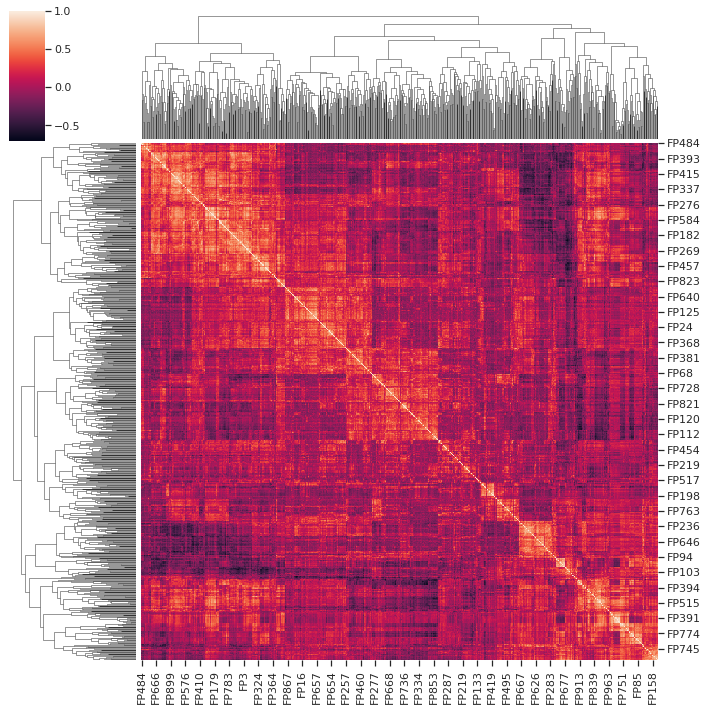

In [ ]:
#plt.figure(figsize= (20,18))
sns.clustermap(X_train.corr())

In [ ]:
'''# Parameters
maxdepth = 10
nestimators = 200
n_splits = 5
output_file = f'RandomForest_maxdepth{maxdepth}_nestimators{nestimators}.bin' '''

**Logistic Regression**

In [ ]:
lr_params ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [ ]:
logreg_cv = GridSearchCV(lr, lr_params, cv=10)

In [ ]:
logreg_cv.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7450604838709678


In [ ]:
ypred=logreg_cv.predict(X_test)

In [ ]:
logreg_cv.score(X_test, y_test)

0.7375

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(y_test,ypred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

**Support Vector Machine**

In [ ]:
svm_params = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, svm_params, cv=10)

In [ ]:
svm_cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'sigmoid'}
accuracy : 0.7514112903225807


In [ ]:
svm_cv.score(X_test, y_test)

0.7375

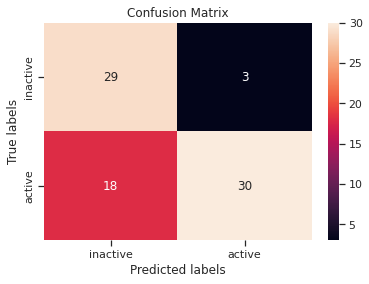

In [ ]:
ypred_svm=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,ypred_svm)

**Decision Tree**

In [ ]:
dt_params = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, dt_params, cv=10)

In [ ]:
tree_cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.7456653225806452


In [ ]:
tree_cv.score(X_test,y_test)

0.7375

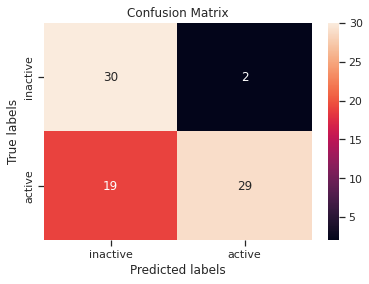

In [ ]:
ypred_dt = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,ypred_dt)

**KNN**

In [ ]:
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, knn_params, cv=10)

In [ ]:
knn_cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1}
accuracy : 0.7452620967741936


In [ ]:
knn_cv.score(X_test,y_test)

0.775

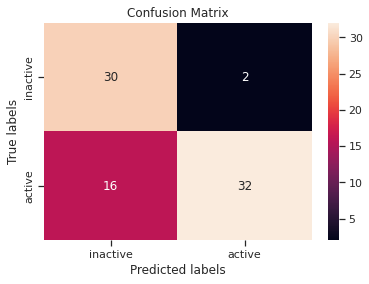

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

**till here**

In [ ]:
# Training
print(f'Training the model')

rf = RandomForestClassifier(max_depth=maxdepth, n_estimators=nestimators, n_jobs=-1,
                            random_state=10).fit(X_train, y_train.values.ravel())

Training the model


In [ ]:
# Validation

print(f'Doing validation')
print(f'ROC AUC is used as performance metric')

cv_scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=n_splits, scoring="roc_auc")

print('Validation results:')
print(f'RandomForest with max_depth={maxdepth} and n_estimators={nestimators}: \
    {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}')

Doing validation
ROC AUC is used as performance metric
Validation results:
RandomForest with max_depth=10 and n_estimators=200:     0.80 +- 0.05


In [ ]:
# Predicting values with RF model on test dataset
print(f'Doing evaluation on test dataset')
y_test_pred = rf.predict(X_test)

Doing evaluation on test dataset


In [ ]:
## Calculate performance metrics
roc_auc_test = roc_auc_score(y_test, y_test_pred)

acc_test = accuracy_score(y_test, y_test_pred)

prec_test = precision_score(y_test, y_test_pred)

recall_test = recall_score(y_test, y_test_pred)

f1score_test = f1_score(y_test, y_test_pred)

In [ ]:
# Print metrics values
print(f'Testing results:')
metrics_names = ["ROC_AUC", "Accuracy", "Precision", "Recall", "F1 score"]
metrics_values = [roc_auc_test, acc_test, prec_test, recall_test, f1score_test]

Testing results:


In [ ]:
metrics = dict(zip(metrics_names, metrics_values))

In [ ]:
headers = ('Metric', 'Value')
spaces = ('----------', '----------')

In [ ]:
head_spaces = [headers, spaces]

In [ ]:
for metric, value in head_spaces:
    print(f'{metric:>10s} {value:>10s}')

    Metric      Value
---------- ----------


In [ ]:
for metric, value in metrics.items():
    print(f'{metric:>10s} {value:>10.2f}')

   ROC_AUC       0.80
  Accuracy       0.78
 Precision       0.92
    Recall       0.69
  F1 score       0.79
